<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/20231212/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


remove all files in /content/drive/MyDrive

In [ ]:
# import os

# for file in os.listdir('/content/drive/MyDrive'):
#   full_path = '/content/drive/MyDrive/' + file
#   if os.path.isfile(full_path):
#     os.remove(full_path)

/content/drive/MyDrive/drone_data

In [ ]:
# !rm -rf /content/drive/MyDrive/with_drone

# 2. Data Preprocessing:  

Take the files  "*.jpg" and "*.txt" in "/content/drive/MyDrive/drone_data" and prepare them to work with a neural network ,YOLOv8 format. From each image corp the drone and Save it in the folder "/content/drive/MyDrive/my_drone_data/drone"

In [ ]:
import os
import cv2
import shutil

# Set the paths
input_folder = "/content/drive/MyDrive/drone_data"
output_folder = "/content/drive/MyDrive/my_drone_data/drone"

# Iterate through each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".txt")):
        file_path = os.path.join(input_folder, filename)

        # Check if the file is an image
        if filename.endswith(".jpg"):
            # Load the image
            image = cv2.imread(file_path)

            # Assume there's a corresponding text file with YOLO format bounding box coordinates
            txt_file_path = os.path.join(input_folder, filename.replace(".jpg", ".txt"))

            # Check if the corresponding text file exists
            if os.path.exists(txt_file_path):
                # Read YOLO format coordinates from the text file
                with open(txt_file_path, 'r') as txt_file:
                    lines = txt_file.readlines()
                    for line in lines:
                        # Parse the coordinates and crop the drone
                        # Note: You may need to adjust the code based on the format of your bounding box coordinates
                        class_label, center_x, center_y, width, height = map(float, line.strip().split())
                        x = int((center_x - width / 2) * image.shape[1])
                        y = int((center_y - height / 2) * image.shape[0])
                        w = int(width * image.shape[1])
                        h = int(height * image.shape[0])
                        cropped_drone = image[y:y + h, x:x + w]

                        # Save the cropped image in the "with_drone" folder
                        output_path = os.path.join(output_folder, f"{filename.replace('.jpg', '')}_cropped.jpg")
                        cv2.imwrite(output_path, cropped_drone)

                      f"{int(class_label)} {center_x} {center_y} {width} {height}\n")

print("Processing complete.")


Processing complete.


Take the .jpg images from "/content/drive/MyDrive/my_drone_data/drone" and resize them to 28*28 use GPU

In [ ]:
pip install pillow tensorflow

Continue with GPU turning the color images into grayscale

In [ ]:
import os
from PIL import Image
import tensorflow as tf

# Set the path to your image directory
image_directory = "/content/drive/MyDrive/my_drone_data/drone"

# Set the target size for resizing
target_size = (28, 28)

# Enable GPU acceleration if available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Function to resize and convert images to grayscale in a directory
def resize_and_convert_to_grayscale(directory, target_size):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Construct the full file path
            file_path = os.path.join(directory, filename)

            # Open, resize, and convert the image to grayscale
            img = Image.open(file_path)
            resized_img = img.resize(target_size, Image.ANTIALIAS)
            grayscale_img = resized_img.convert("L")

            # Save the grayscale image, overwriting the original file
            grayscale_img.save(file_path)

# Resize and convert images using the defined function
resize_and_convert_to_grayscale(image_directory, target_size)


<ipython-input-8-2fa541296df2>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


Crop a random 28x28 region from every .jpg image in "/content/drive/MyDrive/drone_data"  folder and save the cropped  image to the "/content/drive/MyDrive/my_drone_data/no_drone" folder. use GPU

In [ ]:
import os
from PIL import Image
import random
import tensorflow as tf

# Set the path to your original image directory
original_image_directory = "/content/drive/MyDrive/drone_data"

# Set the path to the destination directory for cropped images
cropped_image_directory = "/content/drive/MyDrive/my_drone_data/no_drone"

# Set the target size for cropping
crop_size = (28, 28)

# Enable GPU acceleration if available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Function to crop random 28x28 region from images in a directory
def crop_random_region(directory, crop_size, destination_directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Construct the full file path
            file_path = os.path.join(directory, filename)

            # Open the original image
            img = Image.open(file_path)

            # Get the width and height of the original image
            width, height = img.size

            # Calculate random coordinates for cropping
            left = random.randint(0, width - crop_size[0])
            top = random.randint(0, height - crop_size[1])
            right = left + crop_size[0]
            bottom = top + crop_size[1]

            # Crop the image
            cropped_img = img.crop((left, top, right, bottom))

            # Save the cropped image to the destination directory
            cropped_filename = os.path.join(destination_directory, filename)
            cropped_img.save(cropped_filename)

# Crop random regions and save to the destination directory
crop_random_region(original_image_directory, crop_size, cropped_image_directory)


In the folder "/content/drive/MyDrive/TensorFlow_Datasets" prepare 2 folders called "Train" and "Test". Each of the folders will have 2 subfolders "drone" and "no_drone"

In [ ]:
import os

# Set the path to the main directory
main_directory = "/content/drive/MyDrive/TensorFlow_Datasets"

# Create the "Train" and "Test" folders
train_directory = os.path.join(main_directory, "Train")
test_directory = os.path.join(main_directory, "Test")

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Create subfolders "drone" and "no_drone" in "Train" and "Test"
subfolders = ["drone", "no_drone"]

for folder in subfolders:
    train_subfolder = os.path.join(train_directory, folder)
    test_subfolder = os.path.join(test_directory, folder)

    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(test_subfolder, exist_ok=True)

print("Directory structure created successfully.")


Directory structure created successfully.


# 3. TensorFlow Datasets:

Use the GPU. Take all the images from "/content/drive/MyDrive/my_drone_data/drone" and randomly take 85% of them and put them in "/content/drive/MyDrive/TensorFlow_Datasets/Train/drone"
Put the rest in "/content/drive/MyDrive/TensorFlow_Datasets/Test/drone"
  Take all the images from "/content/drive/MyDrive/my_drone_data/no_drone" randomly take 85% of them and put them in "/content/drive/MyDrive/TensorFlow_Datasets/Train/no_drone"
Put the rest in "/content/drive/MyDrive/TensorFlow_Datasets/Test/no_drone"

In [ ]:
import os
import shutil
import random
import tensorflow as tf

# Set the paths to the source image directories
drone_source_directory = "/content/drive/MyDrive/my_drone_data/drone"
no_drone_source_directory = "/content/drive/MyDrive/my_drone_data/no_drone"

# Set the paths to the destination Train and Test directories
train_directory = "/content/drive/MyDrive/TensorFlow_Datasets/Train"
test_directory = "/content/drive/MyDrive/TensorFlow_Datasets/Test"

# Set the subfolders for "drone" and "no_drone"
subfolders = ["drone", "no_drone"]

# Set the percentage for the training set
train_percentage = 0.85

# Enable GPU acceleration if available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Function to split and move images to Train and Test directories
def split_and_move_images(source_directory, train_dest_directory, test_dest_directory, class_folder):
    # Get the list of all files in the source directory
    all_files = os.listdir(source_directory)

    # Calculate the number of images to move to the training set
    num_train_images = int(len(all_files) * train_percentage)

    # Randomly shuffle the list of files
    random.shuffle(all_files)

    # Split the list into training and testing sets
    train_files = all_files[:num_train_images]
    test_files = all_files[num_train_images:]

    # Move files to the training directory
    for filename in train_files:
        source_path = os.path.join(source_directory, filename)
        dest_path = os.path.join(train_dest_directory, class_folder, filename)
        shutil.move(source_path, dest_path)

    # Move files to the testing directory
    for filename in test_files:
        source_path = os.path.join(source_directory, filename)
        dest_path = os.path.join(test_dest_directory, class_folder, filename)
        shutil.move(source_path, dest_path)

# Create Train and Test directories and subfolders
for folder in subfolders:
    train_subfolder = os.path.join(train_directory, folder)
    test_subfolder = os.path.join(test_directory, folder)

    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(test_subfolder, exist_ok=True)

# Split and move images for "drone" class
split_and_move_images(drone_source_directory, train_directory, test_directory, subfolders[0])

# Split and move images for "no_drone" class
split_and_move_images(no_drone_source_directory, train_directory, test_directory, subfolders[1])

print("Images successfully split and moved to Train and Test directories.")


Images successfully split and moved to Train and Test directories.


in folder "/content/drive/MyDrive/TensorFlow_Datasets" give me a report of how many files are in every folder and sub folder

In [ ]:
import os

def count_files_in_folder(folder_path):
    file_count = 0
    for _, _, files in os.walk(folder_path):
        file_count += len(files)
    return file_count

def report_files_in_folders(main_folder):
    for root, dirs, _ in os.walk(main_folder):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(root, folder)
                file_count = count_files_in_folder(folder_path)
                print(f"Folder: {folder_path}, Files: {file_count}")

# Specify the main folder path
main_folder_path = "/content/drive/MyDrive/TensorFlow_Datasets"

# Generate the report
report_files_in_folders(main_folder_path)


Folder: /content/drive/MyDrive/TensorFlow_Datasets/Train, Files: 10378
Folder: /content/drive/MyDrive/TensorFlow_Datasets/Test, Files: 1832
Folder: /content/drive/MyDrive/TensorFlow_Datasets/Train/drone, Files: 6919
Folder: /content/drive/MyDrive/TensorFlow_Datasets/Train/no_drone, Files: 3459
Folder: /content/drive/MyDrive/TensorFlow_Datasets/Test/drone, Files: 1221
Folder: /content/drive/MyDrive/TensorFlow_Datasets/Test/no_drone, Files: 611


# 4. Build Classifier Model:

take "/content/drive/MyDrive/TensorFlow_Datasets" folder and Build a simple classifier model using TensorFlow/Keras.
Train the model on the training set and evaluate it on the test set.
Plot some images from the dataset to visually inspect the processed images.
Display the accuracy of the trained model on the test set.

Found 10378 images belonging to 2 classes.
Found 1832 images belonging to 2 classes.
Epoch 1/3
325/325 [==============================] - 188s 566ms/step - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.0348 - val_accuracy: 0.9891
Epoch 2/3
325/325 [==============================] - 18s 56ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 3/3
325/325 [==============================] - 18s 56ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0375 - val_accuracy: 0.9913


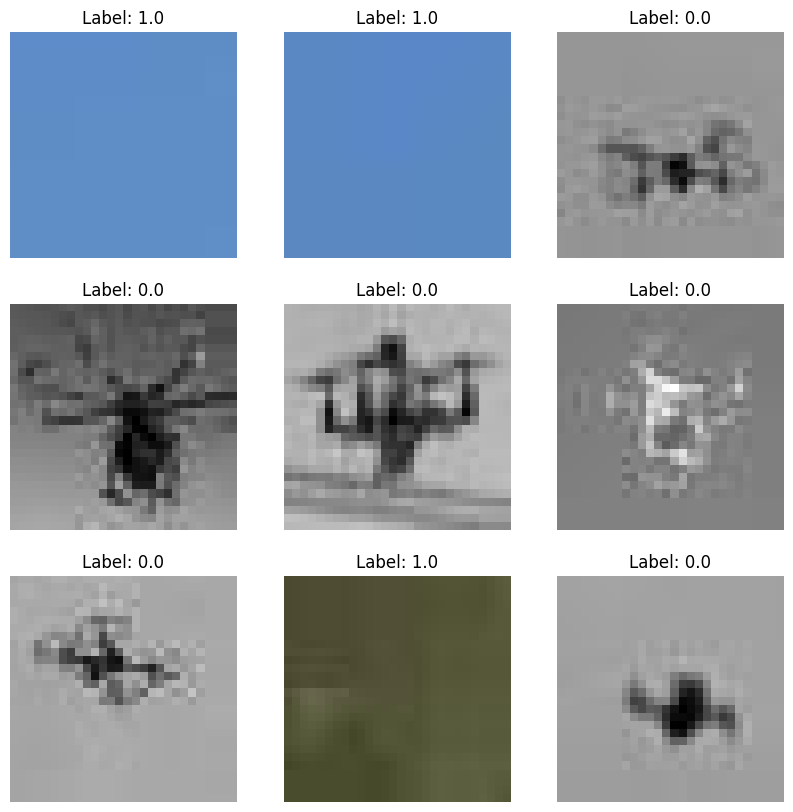

58/58 [==============================] - 3s 44ms/step - loss: 0.0375 - accuracy: 0.9913
Test Accuracy: 99.13%


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the paths to the train and test datasets
train_data_dir = "/content/drive/MyDrive/TensorFlow_Datasets/Train"
test_data_dir = "/content/drive/MyDrive/TensorFlow_Datasets/Test"

# Image dimensions and batch size
img_height, img_width = 28, 28
batch_size = 32

# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # 'categorical' for multiple classes
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Build a simple convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multiple classes
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=3, validation_data=test_generator)

# Plot some images from the dataset
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis("off")
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

MSE

Epoch 1/3
325/325 [==============================] - 19s 59ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0312 - val_accuracy: 0.9924
Epoch 2/3
325/325 [==============================] - 17s 54ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0296 - val_accuracy: 0.9924
Epoch 3/3
325/325 [==============================] - 17s 53ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0274 - val_accuracy: 0.9924


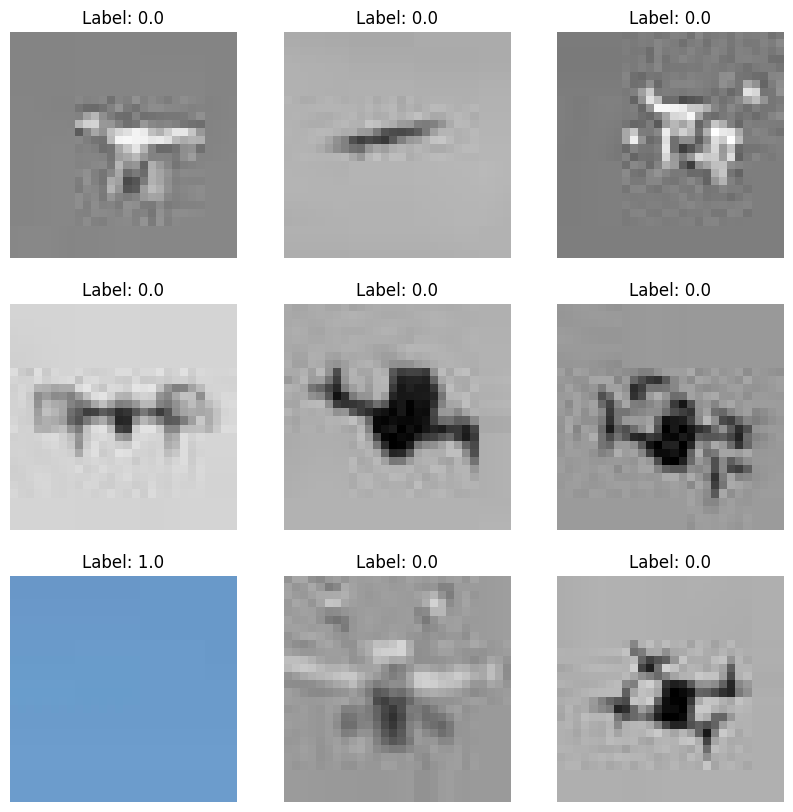

58/58 [==============================] - 2s 43ms/step - loss: 0.0274 - accuracy: 0.9924
Test Accuracy: 99.24%
58/58 [==============================] - 2s 42ms/step
Mean Squared Error (MSE): 0.4268558951965066


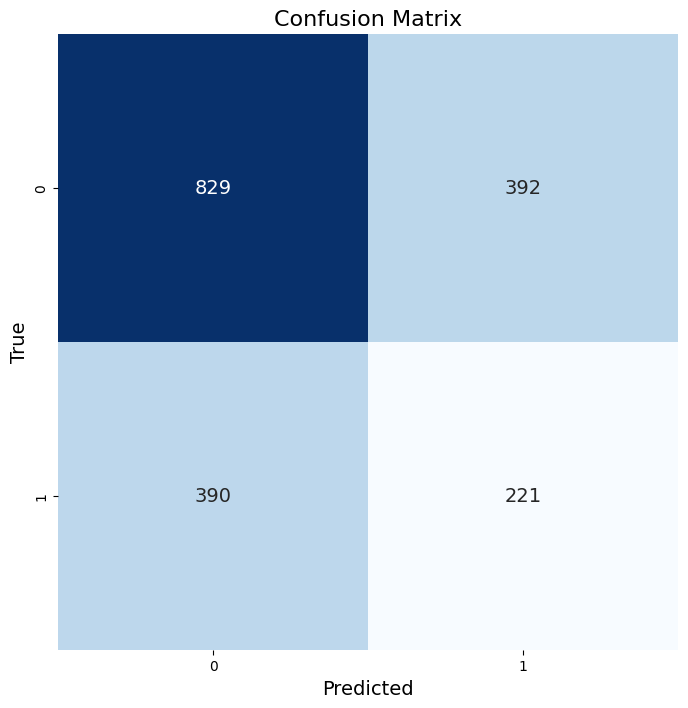

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns

# ... (your existing code)

# Train the model
history = model.fit(train_generator, epochs=3, validation_data=test_generator)

# Plot some images from the dataset
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis("off")
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(test_generator)
y_true = test_generator.classes  # true labels
y_pred = (predictions > 0.5).astype(int).reshape(-1)  # predicted labels

# Print Mean Squared Error (MSE) graph
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()
